In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\appuv\Desktop\b\mtn_customer_churns.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

In [3]:
(df.columns)

Index(['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State',
       'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review',
       'Customer Tenure in months', 'Subscription Plan', 'Unit Price',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'Customer Churn Status'],
      dtype='object')

In [5]:
df.describe()

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage
count,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02,974.000000
mean,48.043121,2.947639,31.422998,19196.663244,10.564682,2.046696e+05,99.304764
std,17.764307,1.384219,17.191256,25586.726985,5.709427,3.247855e+05,57.739511
min,16.000000,1.000000,1.000000,350.000000,1.000000,3.500000e+02,0.820000
25%,32.000000,2.000000,17.000000,5500.000000,5.000000,3.300000e+04,47.637500
50%,49.000000,3.000000,31.000000,14500.000000,11.000000,1.080000e+05,103.330000
75%,63.750000,4.000000,47.000000,24000.000000,15.000000,2.610000e+05,149.697500
max,80.000000,5.000000,60.000000,150000.000000,20.000000,3.000000e+06,200.000000


C:\Users\appuv\AppData\Local\Temp\ipykernel_15752\218637828.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')


ADF Statistic: -18.415171996428505
p-value: 2.180901615165665e-30


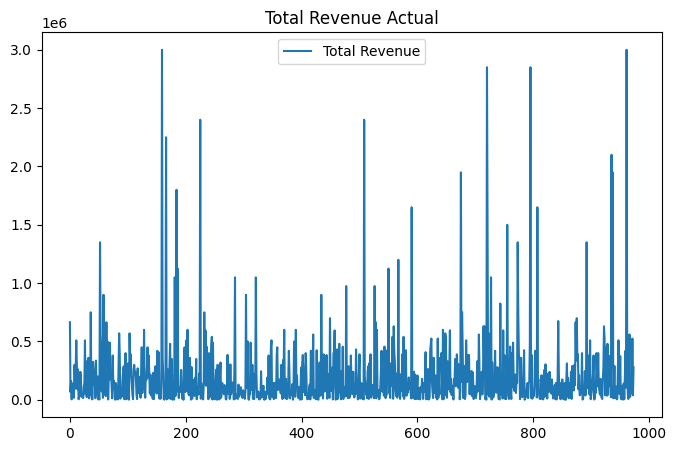

                               SARIMAX Results                                
Dep. Variable:          Total Revenue   No. Observations:                  974
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13744.286
Date:                Sat, 17 Jan 2026   AIC                          27494.571
Time:                        13:49:33   BIC                          27509.213
Sample:                             0   HQIC                         27500.143
                                - 974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0006      0.036     -0.017      0.986      -0.071       0.070
ma.L1         -0.9939      0.006   -156.387      0.000      -1.006      -0.981
sigma2      1.349e+11   7.02e-14   1.92e+24      0.0

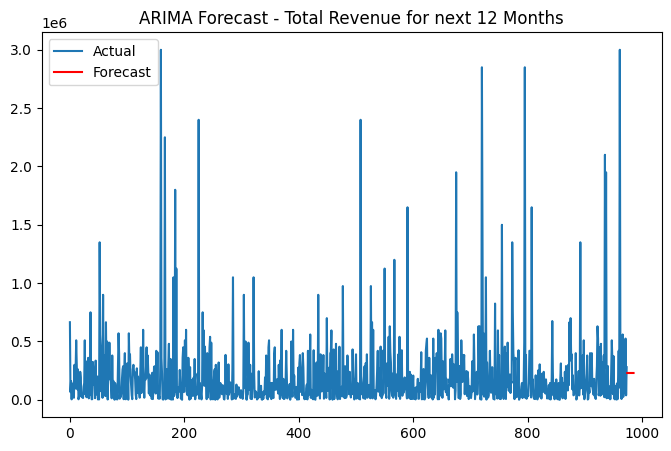

In [29]:
#Predicting nexxt 12 months Total reveneue using arima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(r"C:\Users\appuv\Desktop\b\mtn_customer_churns.csv")
X = df.drop(columns=['Total Revenue'])
y = df['Total Revenue']

df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df = df.sort_values('Date of Purchase')

adf_test = adfuller(y)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
y_diff = y.diff().dropna()

plt.figure(figsize=(8,5))
plt.plot(y, label='Total Revenue')
plt.title('Total Revenue Actual')
plt.legend()
plt.show()

model = ARIMA(y, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

forecast_months = 12  
forecast = model_fit.forecast(steps=forecast_months)
print(f"Forecasted revenue for the next {forecast_months} months:\n", forecast)

plt.figure(figsize=(8,5))
plt.plot(y, label='Actual')
plt.plot(range(len(y), len(y)+forecast_months), forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast - Total Revenue for next 12 Months')
plt.show()




C:\Users\appuv\AppData\Local\Temp\ipykernel_15752\1864625074.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')


ADF Statistic: -18.415171996428505
p-value: 2.180901615165665e-30


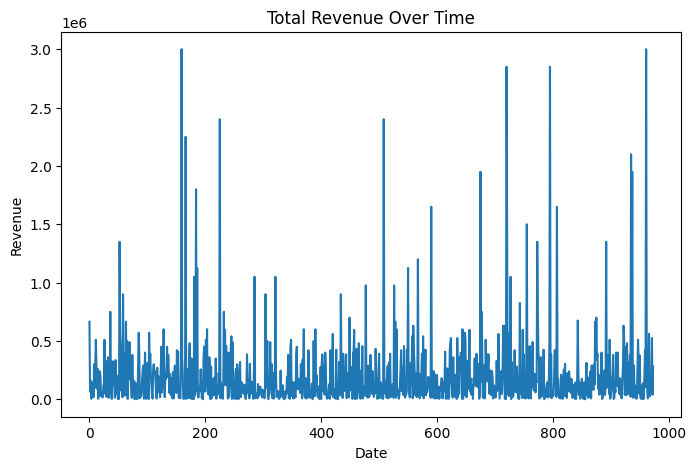

                                     SARIMAX Results                                      
Dep. Variable:                      Total Revenue   No. Observations:                  974
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -13537.793
Date:                            Sat, 17 Jan 2026   AIC                          27085.587
Time:                                    14:03:57   BIC                          27109.853
Sample:                                         0   HQIC                         27094.834
                                            - 974                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0440      0.066     -0.671      0.502      -0.173       0.085
ma.L1         -0.8832      0.034   

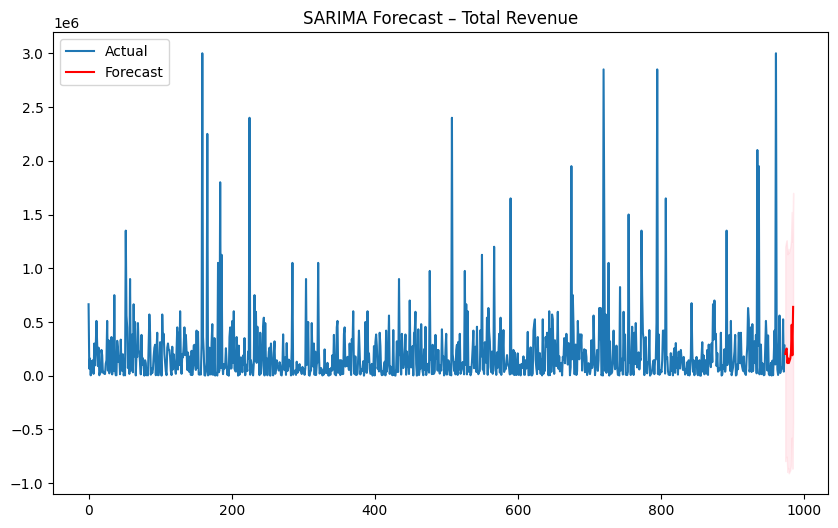

In [38]:
#predicting revenue using sarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(r"C:\Users\appuv\Desktop\b\mtn_customer_churns.csv")
X = df.drop(columns=['Total Revenue'])  
y = df['Total Revenue']

df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df = df.sort_values('Date of Purchase')
df.set_index('Date of Purchase', inplace=True)

adf_result = adfuller(y)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

plt.figure(figsize=(8,5))
plt.plot(y)
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

sarima_model = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result = sarima_model.fit()
print(sarima_result.summary())

forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(10,6))
plt.plot(y, label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink',
    alpha=0.3
)

plt.title('SARIMA Forecast – Total Revenue')
plt.legend()
plt.show()



Accuracy: 0.48464163822525597

Confusion Matrix:
 [[ 9  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  1  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  2  4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  7  2  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 12  4  2  0  9  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  2  8  3  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  3  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3 16  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  6  3  2  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  2  2 13  4  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  7  3  4  1  0  0]
 [ 0

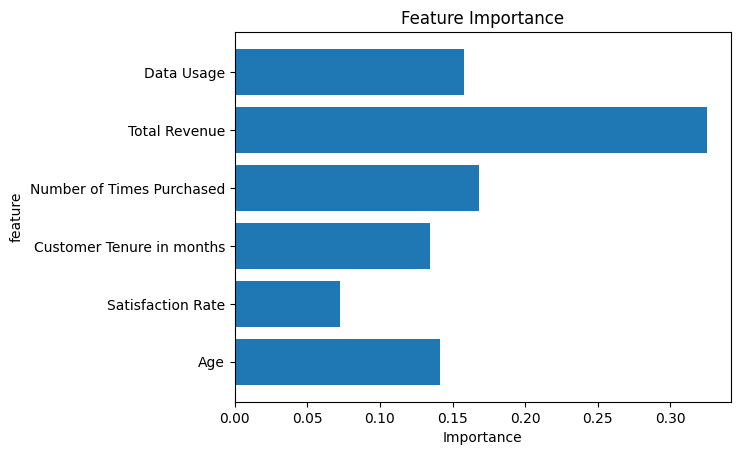

In [35]:
#Predciting unit price using random forest classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv(r"C:\Users\appuv\Desktop\b\mtn_customer_churns.csv")
numeric_features = df.select_dtypes(include=[np.number])
x = numeric_features.drop('Unit Price', axis=1)
y = numeric_features['Unit Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(
    n_estimators=100,  #no of treess
    oob_score=True,    #enable out of bag
    random_state=42
) 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nclassification Report:\n", classification_report(y_test, y_pred))
print("OOB Score:", model.oob_score_)

#Cross-validation Score: unseen data (with yourn tarinng set)
cv_score  = cross_val_score(model, x, y, cv=5)
print("cross Validation Score(Mean):", cv_score.mean())

#feature importance plot
importances = model.feature_importances_
features = x.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("feature")
plt.title("Feature Importance")
plt.show()
      


Accuracy: 0.24615384615384617
              precision    recall  f1-score   support

           1       0.25      0.35      0.29        37
           2       0.21      0.43      0.28        42
           3       0.00      0.00      0.00        42
           4       0.30      0.35      0.33        48
           5       0.00      0.00      0.00        26

    accuracy                           0.25       195
   macro avg       0.15      0.23      0.18       195
weighted avg       0.17      0.25      0.20       195



C:\Users\appuv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\appuv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\appuv\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

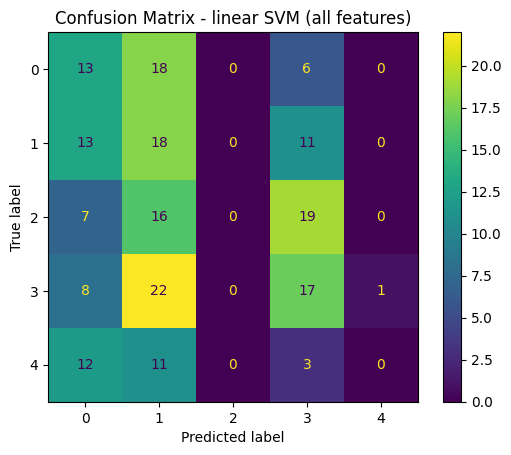

In [36]:
#predicting satisfaction rate using Support vector machine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


df = pd.read_csv(r"C:\Users\appuv\Desktop\b\mtn_customer_churns.csv")
numeric_features = df.select_dtypes(include=[np.number])
x = numeric_features.drop('Satisfaction Rate', axis=1)
y = numeric_features['Satisfaction Rate']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm_clf = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm_clf.fit(x_train, y_train)
y_pred = svm_clf.predict(x_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix - linear SVM (all features)')
plt.show()



In [39]:
import pandas as pd
from sqlalchemy import create_engine
username = "postgres"
password = "appuappu"
host = "localhost"
port = "5432"
database = "MYDATABASE1"

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
table_name = "mtn"
df = pd.read_csv(r"C:\Users\appuv\Desktop\b\mtn_customer_churns.csv")
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data sucessfully loaded into table '{table_name}' in database '{database}'.")

Data sucessfully loaded into table 'mtn' in database 'MYDATABASE1'.
